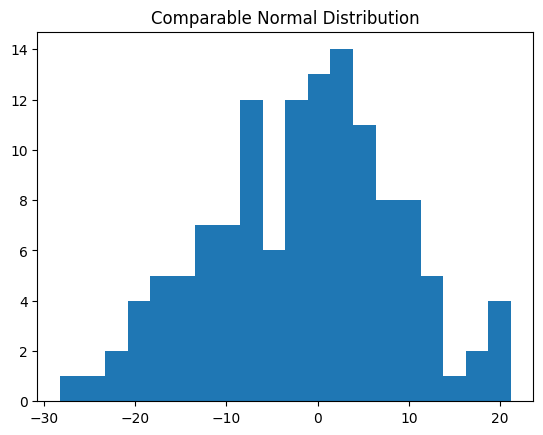

In [1]:
# Generate graph of normal dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Z_LAYER_SIZE = 128

real_dist = 10 * np.random.randn(1, Z_LAYER_SIZE)
plt.hist(real_dist[0], bins=20)
plt.title("Comparable Normal Distribution")
plt.show()

[(0, (0, 1)), (1, (0, 1)), (2, (0, 1)), (3, (0, 1)), (4, (0, 1)), (5, (0, 1)), (6, (0, 1)), (7, (0, 1)), (8, (0, 1)), (9, (0, 1)), (10, (0, 1)), (11, (0, 1)), (12, (0, 1)), (13, (0, 1)), (14, (0, 1)), (15, (0, 1)), (16, (0, 1)), (17, (0, 1)), (18, (0, 1)), (19, (0, 1)), (20, (0, 1)), (21, (0, 1)), (22, (0, 1)), (23, (0, 1)), (24, (0, 1)), (25, (0, 1)), (26, (0, 1)), (27, (1, 0)), (28, (1, 0)), (29, (1, 0)), (30, (1, 0)), (31, (1, 0)), (32, (1, 0)), (33, (1, 0)), (34, (1, 0)), (35, (1, 0)), (36, (1, 0)), (37, (1, 0)), (38, (1, 0)), (39, (1, 0)), (40, (1, 0)), (41, (1, 0)), (42, (1, 0)), (43, (1, 0)), (44, (1, 0)), (45, (1, 0)), (46, (1, 0)), (47, (1, 0)), (48, (1, 0)), (49, (1, 0)), (50, (1, 0)), (51, (1, 0)), (52, (1, 0)), (53, (1, 0)), (54, (1, 0)), (55, (1, 0)), (56, (1, 0)), (57, (1, 0)), (58, (1, 0)), (59, (1, 0)), (60, (1, 0)), (61, (1, 0)), (62, (1, 0)), (63, (1, 0)), (64, (1, 0)), (65, (1, 0)), (66, (1, 0)), (67, (1, 0)), (68, (1, 0)), (69, (1, 0)), (70, (1, 0)), (71, (1, 0)), (

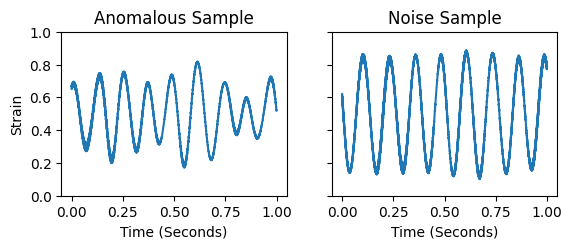

In [43]:
# Display different signals
from pickle import load

x_tests, y_tests = load(open("data/test_4096_1.pickle", "rb"))
x_train = load(open("data/train_4096_1.pickle", "rb"))

fig, ax = plt.subplots(nrows=1, ncols=2, sharey="row")

print(list(enumerate(y_tests[0]))) # Why do some of these look so weird 8,
ax[0].set_ylabel("Strain")
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Time (Seconds)")
ax[0].plot([i/4096 for i in range(4096)], x_tests[0][8])
ax[0].set_title("Anomalous Sample")
ax[0].set_aspect(.8)

# ax[1].set_ylabel("Strain")
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Time (Seconds)")
ax[1].plot([i/4096 for i in range(4096)], x_tests[0][79])
ax[1].set_title("Noise Sample")
ax[1].set_aspect(.8)

fig.show()
fig.savefig("two-samples.svg")

/home/ian/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/ian/miniconda3/envs/tf/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


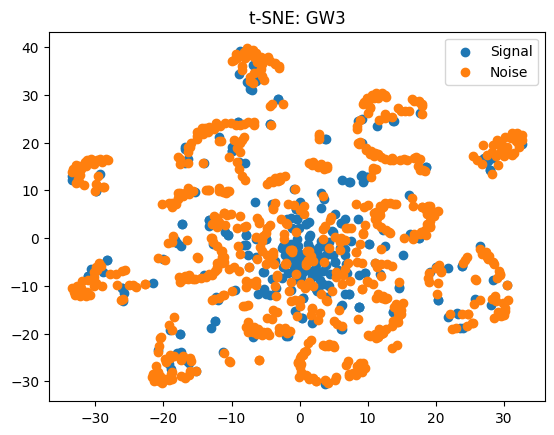

In [16]:
# T-SNE Graph
from sklearn.manifold import TSNE

t_sne = TSNE()

folds = [
    "20230322223044",
    "20230322223210",
    "20230322223304",
    "20230322223500",
    "20230322223556",
    "20230322223723",
    "20230322223811",
    "20230322223950",
    "20230322224043",
    "20230322224213"
]

pos_splits, neg_splits = [], []

for f in folds:
    split = pd.read_pickle("z_layers/%s.pickle.gzip" % f).values.tolist()
    split = [(d[2:], d[0]) for d in split]
    pos_splits += [s[0] for s in split if s[1] == 1]
    neg_splits += [s[0] for s in split if s[1] == 0]

splits = t_sne.fit_transform(pos_splits + neg_splits)

pos_splits = splits[:len(pos_splits)]
neg_splits = splits[len(pos_splits):]

plt.scatter([v[0] for v in pos_splits], [v[1] for v in pos_splits], label="Signal")
plt.scatter([v[0] for v in neg_splits], [v[1] for v in neg_splits], label="Noise")
plt.legend()
plt.title("t-SNE: GW3")
plt.show()

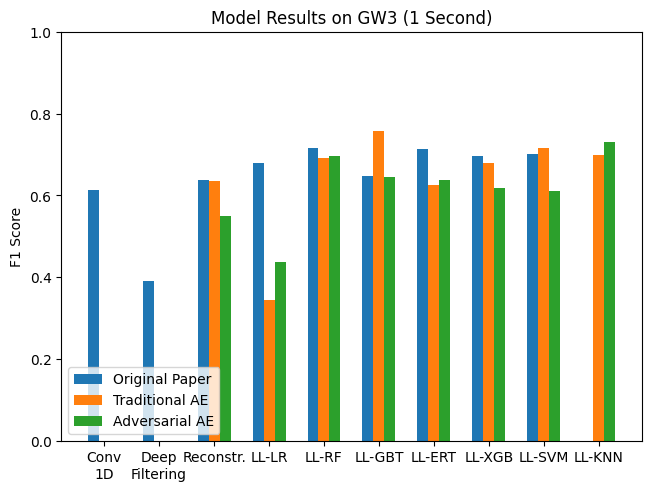

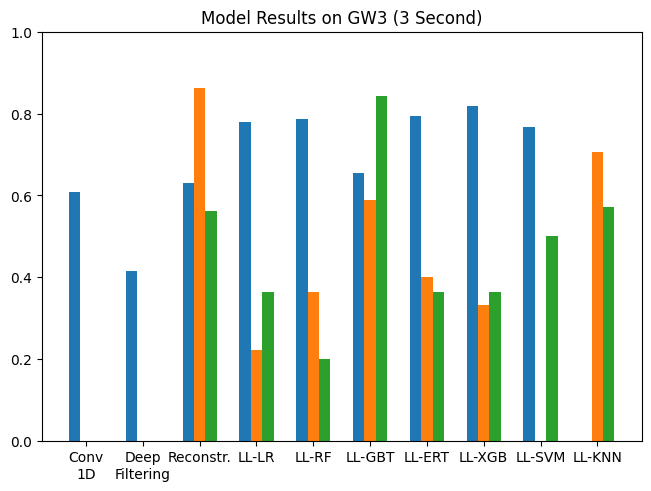

In [40]:
# GW3 results bar chart

result_categories = ("Conv\n1D", "Deep\nFiltering", "Reconstr.", "LL-LR", "LL-RF", "LL-GBT", "LL-ERT", "LL-XGB", "LL-SVM", "LL-KNN")

best_f1_scores_gw3 = {
    "Original Paper (1 Second)": (0.6135, 0.3911, 0.6388, 0.6795, 0.7160, 0.6464, 0.7144, 0.6969, 0.7021, None),
    "Original Paper (3 Second)": (0.6096, 0.4155, 0.6292, 0.7797, 0.7877, 0.6559, 0.7947, 0.8194, 0.7666, None),
    "Traditional AE (1 Second)": (None, None, 0.6361, 0.3444, 0.6922, 0.7581, 0.6267, 0.6794, 0.7156, 0.6988),
    "Traditional AE (3 Second)": (None, None, 0.8627, 0.2222, 0.3636, 0.5882, 0.4000, 0.3333, 0.0000, 0.7059),
    "Adversarial AE (1 Second)": (None, None, 0.5500, 0.4376, 0.6955, 0.6440, 0.6389, 0.6188, 0.6110, 0.7303),
    "Adversarial AE (3 Second)": (None, None, 0.5614, 0.3636, 0.2000, 0.8421, 0.3636, 0.3636, 0.5000, 0.5714),
}

best_f1_scores_gw3_1sec = { # Replaced None with 0
    "Original Paper": (0.6135, 0.3911, 0.6388, 0.6795, 0.7160, 0.6464, 0.7144, 0.6969, 0.7021, 0),
    "Traditional AE": (0, 0, 0.6361, 0.3444, 0.6922, 0.7581, 0.6267, 0.6794, 0.7156, 0.6988),
    "Adversarial AE": (0, 0, 0.5500, 0.4376, 0.6955, 0.6440, 0.6389, 0.6188, 0.6110, 0.7303),
}

best_f1_scores_gw3_3sec = { # Replaced None with 0
    "Original Paper": (0.6096, 0.4155, 0.6292, 0.7797, 0.7877, 0.6559, 0.7947, 0.8194, 0.7666, 0),
    "Traditional AE": (0, 0, 0.8627, 0.2222, 0.3636, 0.5882, 0.4000, 0.3333, 0.0000, 0.7059),
    "Adversarial AE": (0, 0, 0.5614, 0.3636, 0.2000, 0.8421, 0.3636, 0.3636, 0.5000, 0.5714),
}

# This code is from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
x = np.arange(len(result_categories))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in best_f1_scores_gw3_1sec.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_title("Model Results on GW3 (1 Second)")
ax.set_xticks(x + width, result_categories, wrap=True)
ax.legend(loc='lower left')
ax.set_ylim([0, 1])
plt.savefig("gw3-res-1.svg")

plt.show()

x = np.arange(len(result_categories))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in best_f1_scores_gw3_3sec.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('F1 Score')
ax.set_title("Model Results on GW3 (3 Second)")
ax.set_xticks(x + width, result_categories, wrap=True)
# ax.set_yticks([])
# ax.legend(loc='lower left')
ax.set_ylim([0, 1])
plt.savefig("gw3-res-3.svg")

plt.show()

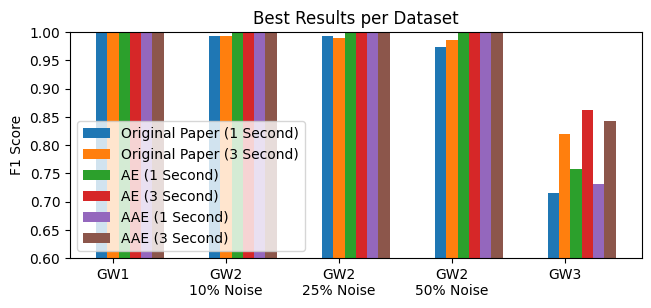

In [13]:
# Best result bar chart

result_categories = ("GW1", "GW2\n10% Noise", "GW2\n25% Noise", "GW2\n50% Noise", "GW3")

best_f1_scores = {
    "Original Paper (1 Second)": (1, 0.9933, 0.9933, 0.9734, 0.7160),
    "Original Paper (3 Second)": (1, 0.9933, 0.9888, 0.9866, 0.8194),
    "AE (1 Second)": (1, 1, 1, 1, 0.7581),
    "AE (3 Second)": (1, 1, 1, 1, 0.8627),
    "AAE (1 Second)": (1, 1, 1, 1, 0.7303),
    "AAE (3 Second)": (1, 1, 1, 1, 0.8421),
}

# This code is from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
x = np.arange(len(result_categories))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in best_f1_scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 Score')
ax.set_ylim([.6, 1])
ax.set_title("Best Results per Dataset")
ax.set_xticks(x + width, result_categories, wrap=True)
ax.legend(loc='lower left')
ax.set_aspect(5)

plt.savefig("best_res.svg")

plt.show()


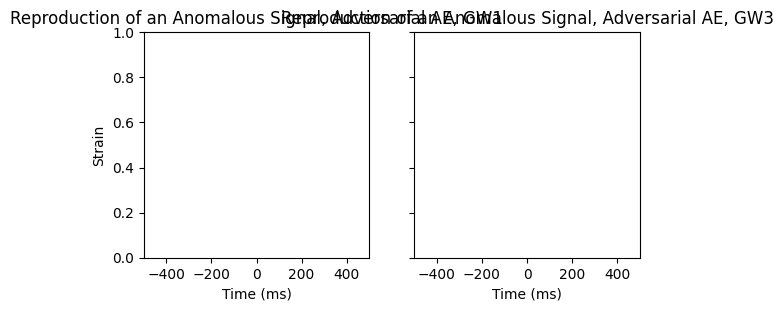

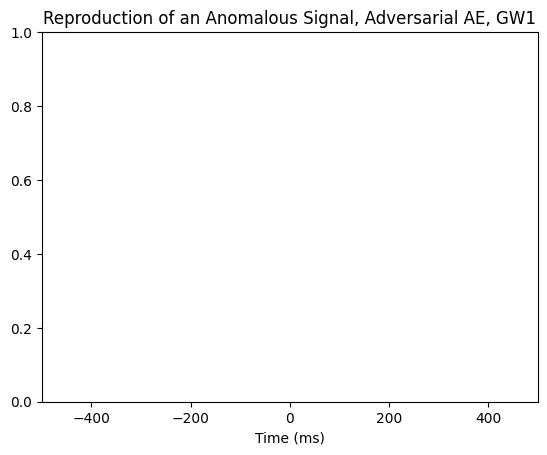

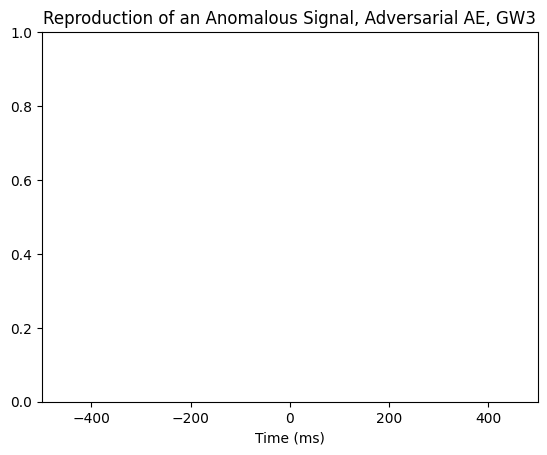

In [39]:
# Blank plots with just text

fig, ax = plt.subplots(nrows=1, ncols=2, sharey="row")

ax[0].set_ylabel("Strain")
ax[0].set_ylim([0, 1])
# ax[1].set_ylabel("Strain")
ax[1].set_ylim([0, 1])

ax[0].set_xlabel("Time (ms)")
ax[0].set_xlim([-500, 500])
ax[1].set_xlabel("Time (ms)")
ax[1].set_xlim([-500, 500])

ax[0].set_aspect(1000)
ax[1].set_aspect(1000)

ax[0].set_title("Reproduction of an Anomalous Signal, Adversarial AE, GW1")
ax[1].set_title("Reproduction of an Anomalous Signal, Adversarial AE, GW3")

plt.show()

# plt.ylabel("Strain")
# plt.ylim([0, 1])

plt.xlabel("Time (ms)")
plt.xlim([-500, 500])

plt.title("Reproduction of an Anomalous Signal, Adversarial AE, GW1")
plt.savefig("repro-box-1.svg")

plt.show()

# plt.ylabel("Strain")
# plt.ylim([0, 1])

plt.xlabel("Time (ms)")
plt.xlim([-500, 500])

plt.title("Reproduction of an Anomalous Signal, Adversarial AE, GW3")
plt.savefig("repro-box-3.svg")

plt.show()
